# Market Basket Analysis (MBA) with Apriori

Pada code ini akan dilakukan market basket analisis dengan metode apriori dari data transaksi pembelian 24 customer pada sebuah online shop.
<br>
<br>
Analisis ini ditujukan untuk melihat frekuensi penjualan masing-masing item pada online shop tersebut serta item mana saja yang sering dipilih secara bersamaan pada online shop tersebut. Sehingga dapat memberikan rekomendasi:
1. Susunan peletakan item barang pada website ataupun aplikasi online shop.
2. Rekomendasi item yang sering dibeli oleh customer.
3. Promo untuk item yang kurang diminati oleh customer.
4. Paket bundling untuk item yang kurang dimiinati dengan item yang sering diminati untuk meningkatkan penjualan.

Data yang digunakan terdiri atas 5 features, yaitu waktu transaksi customer pada online shop, nama customer, item pertama yang dimasukkan ke dalam keranjang, item kedua yang dimasukkan ke dalam keranjang, dan item ketiga yang dimasukkan ke dalam keranjang.
<br>

## Import Librarys

In [1]:
# import librarys yang diperlukan untuk MBA dengan Apriori
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Load Data

In [2]:
# load data transaksi 24 customer dari suatu online shop
data = pd.read_csv('../data/onlineshop.csv')
data.head()

,Timestamp,Name,Item 1,Item 2,Item 3
0,2019/09/17 8:58:22 AM GMT+7,Ido,HP,Racket,Watch
1,2019/09/17 8:58:24 AM GMT+7,Faizah,HP,Camera,Watch
2,2019/09/17 8:58:30 AM GMT+7,Andre,Watch,Camera,Music Pad
3,2019/09/17 8:58:30 AM GMT+7,Laili,Camera,Watch,Mouse
4,2019/09/17 8:58:33 AM GMT+7,Tara,HP,Watch,Music Pad


Dari data di atas terlihat bahwa terdapat 5 features dari transaksi customer pada suatu online shop.
1. Timestamp : waktu transaksi customer pada online shop
2. Name : nama customer yang telah melakukan transaksi pada online shop
3. Item 1 : item pertama yang dipilih customer untuk dimasukkan pada keranjang belanja
4. Item 2 : item kedua yang dipilih customer untuk dimasukkan pada keranjang belanja
5. Item 1 : item ketiga yang dipilih customer untuk dimasukkan pada keranjang belanja

## Features Importance

In [3]:
# drop feature waktu transaksi masing-masing customer sebab untuk MBA ini tidak akan digunakan
data1 = data.drop(columns='Timestamp', axis=1)
data1.head()

,Name,Item 1,Item 2,Item 3
0,Ido,HP,Racket,Watch
1,Faizah,HP,Camera,Watch
2,Andre,Watch,Camera,Music Pad
3,Laili,Camera,Watch,Mouse
4,Tara,HP,Watch,Music Pad


In [4]:
# membuat feature nama customer sebagai index sebab untuk MBA nama customer tidak akan digunakan
dataset = data1.set_index('Name')
dataset.head()

,Item 1,Item 2,Item 3
Name,,,
Ido,HP,Racket,Watch
Faizah,HP,Camera,Watch
Andre,Watch,Camera,Music Pad
Laili,Camera,Watch,Mouse
Tara,HP,Watch,Music Pad


Pada market basket analysis feature waktu transaksi masing-masing customer tidak akan digunakan sehingga pada case ini feature Timestamp akan dihapuskan. Kemudian nama customer pun sebenarnya juga tidak akan digunakan, namun agar data dapat dengan mudah dibaca, maka nama customer dijadikan index dari data. Alhasil hanya 3 features yang digunakan pada market basket analysis ini, yaitu item-item yang diminati oleh customer pada setiap transaksi.

## Visualization each Item Ordered

Text(0.5, 1.0, 'Ordered on Item 1')

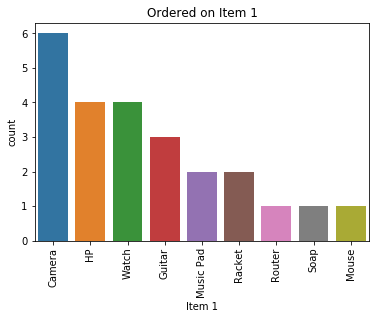

In [5]:
#visualisasi countplot item 1
sns.countplot(x = 'Item 1', data = dataset, order = dataset['Item 1'].value_counts().iloc[:23].index)
plt.xticks(rotation=90)
plt.title('Ordered on Item 1')

Text(0.5, 1.0, 'Ordered on Item 2')

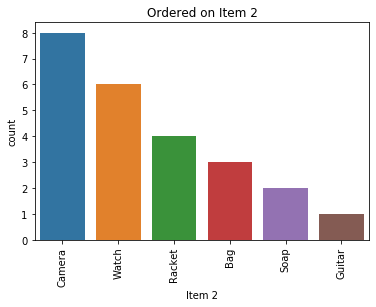

In [6]:
#visualisasi countplot item 2
sns.countplot(x = 'Item 2', data = dataset, order = dataset['Item 2'].value_counts().iloc[:23].index)
plt.xticks(rotation=90)
plt.title('Ordered on Item 2')

Text(0.5, 1.0, 'Ordered on Item 3')

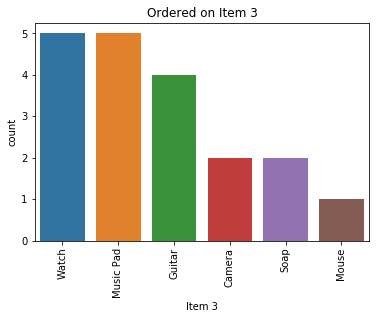

In [7]:
#visualisasi countplot item 3
sns.countplot(x = 'Item 3', data = dataset, order = dataset['Item 3'].value_counts().iloc[:23].index)
plt.xticks(rotation=90)
plt.title('Ordered on Item 3')

Dari countplot ketiga item yang diminati oleh customer dapat disimpulkan bahwa:
1. Camera dan Watch adalah item yang paling diminati oleh customer pada online shop tersebut.
2. Mouse dan Soap adalah item yang paling kurang diminati oleh customer pada online shop tersebut.

Dengan simpulan tersebut maka kita dapat mencari hubungan erat item yang kurang diminati dengan item yang diminati sehingga dapat memberikan rekomendasi dalam bentuk:
1. Paket bundling untuk item yang kurang diminati dengan item yang diminati.
2. Memberikan rekomendasi produk yang kurang diminati pada customer ketika customer tersebut sedang melihat produk yang lebih diminati.

Pada akhirnya diharapkan proses analisis ini dapat meningkatkan penjualan di online shop tersebut.

## Convert categorical variable into dummy variables

In [8]:
# membuat dummies variables pada dataset yang digunakan untuk MBA
data_MBA = pd.get_dummies(dataset)
data_MBA.head()

,Item 1_Camera,Item 1_Guitar,Item 1_HP,Item 1_Mouse,Item 1_Music Pad,Item 1_Racket,Item 1_Router,Item 1_Soap,Item 1_Watch,Item 2_Bag,...,Item 2_Guitar,Item 2_Racket,Item 2_Soap,Item 2_Watch,Item 3_Camera,Item 3_Guitar,Item 3_Mouse,Item 3_Music Pad,Item 3_Soap,Item 3_Watch
Name,,,,,,,,,,,,,,,,,,,,,
Ido,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
Faizah,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Andre,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
Laili,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
Tara,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Diketahui bahwa 3 features yang digunakan adalah variabel kategorik maka perlu dilakukan konversi ke variabel numerik untuk market basket analysis. Dalam case ini digunakan get_dummies untuk merubah variabel kategorik ke variabel numerik.

## Frequent Items

In [9]:
# Build up the frequent items 
frequent_itemsets = apriori(data_MBA, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
7,0.333333,(Item 2_Camera)
0,0.250000,(Item 1_Camera)
10,0.250000,(Item 2_Watch)
15,0.208333,(Item 3_Watch)
13,0.208333,(Item 3_Music Pad)
12,0.166667,(Item 3_Guitar)
5,0.166667,(Item 1_Watch)
16,0.166667,"(Item 2_Watch, Item 1_Camera)"
2,0.166667,(Item 1_HP)
8,0.166667,(Item 2_Racket)


Dari frequent items di atas dapat memperkuat argumen sebelumnya pada countplot dengan menggunakan minimum support 0.05 didapat bahwa Camera dan Watch adalah item yang paling diminati oleh customer untuk pembelian single item. Kemudian dari frequent items juga dapat diketahui bahwa ternyata item yang kurang diminati oleh customer untuk pembelian single item adalah racket dan music pad.

## Market Basket Analysis

In [10]:
# membuat association rules market basket analysis
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,"(Item 3_Music Pad, Item 1_Watch)",(Item 2_Camera),0.083333,0.333333,0.083333,1.000000,3.000000,0.055556,inf
29,"(Item 2_Camera, Item 1_Watch)",(Item 3_Music Pad),0.083333,0.208333,0.083333,1.000000,4.800000,0.065972,inf
23,"(Item 2_Camera, Item 1_HP)",(Item 3_Watch),0.083333,0.208333,0.083333,1.000000,4.800000,0.065972,inf
9,(Item 1_Racket),(Item 3_Guitar),0.083333,0.166667,0.083333,1.000000,6.000000,0.069444,inf
7,(Item 1_HP),(Item 3_Watch),0.166667,0.208333,0.125000,0.750000,3.600000,0.090278,3.166667
0,(Item 2_Watch),(Item 1_Camera),0.250000,0.250000,0.166667,0.666667,2.666667,0.104167,2.250000
1,(Item 1_Camera),(Item 2_Watch),0.250000,0.250000,0.166667,0.666667,2.666667,0.104167,2.250000
3,(Item 1_Guitar),(Item 2_Camera),0.125000,0.333333,0.083333,0.666667,2.000000,0.041667,2.000000
28,"(Item 2_Camera, Item 3_Music Pad)",(Item 1_Watch),0.125000,0.166667,0.083333,0.666667,4.000000,0.062500,2.500000
24,"(Item 3_Watch, Item 1_HP)",(Item 2_Camera),0.125000,0.333333,0.083333,0.666667,2.000000,0.041667,2.000000


In [11]:
# membuat association rules market basket analysis
# display high confidence
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='confidence', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,"(Item 3_Music Pad, Item 1_Watch)",(Item 2_Camera),0.083333,0.333333,0.083333,1.00,3.0,0.055556,inf
29,"(Item 2_Camera, Item 1_Watch)",(Item 3_Music Pad),0.083333,0.208333,0.083333,1.00,4.8,0.065972,inf
23,"(Item 2_Camera, Item 1_HP)",(Item 3_Watch),0.083333,0.208333,0.083333,1.00,4.8,0.065972,inf
9,(Item 1_Racket),(Item 3_Guitar),0.083333,0.166667,0.083333,1.00,6.0,0.069444,inf
7,(Item 1_HP),(Item 3_Watch),0.166667,0.208333,0.125000,0.75,3.6,0.090278,3.166667


In [12]:
# membuat association rules market basket analysis
# display low confidence
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='confidence', ascending=False).tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(Item 2_Camera),(Item 1_Watch),0.333333,0.166667,0.083333,0.25,1.5,0.027778,1.111111
25,(Item 2_Camera),"(Item 3_Watch, Item 1_HP)",0.333333,0.125000,0.083333,0.25,2.0,0.041667,1.166667
4,(Item 2_Camera),(Item 1_HP),0.333333,0.166667,0.083333,0.25,1.5,0.027778,1.111111
2,(Item 2_Camera),(Item 1_Guitar),0.333333,0.125000,0.083333,0.25,2.0,0.041667,1.166667
31,(Item 2_Camera),"(Item 3_Music Pad, Item 1_Watch)",0.333333,0.083333,0.083333,0.25,3.0,0.055556,1.222222


## Conclusion

Dari hasil yang didapat di atas dapat memberikan rekomendasi:
1. Ketika customer melihat suatu item tertentu maka akan ditampilkan pula rekomendasi item yang memiliki hubungan erat dengan item tersebut dengan harapan ketika customer membeli item pertama maka akan memberikan triger untuk membeli item-item berikutnya sehingga dapat meningkatkan item yang terjual dan meningkatkan transaksi. Misalnya:
    - Ketika customer membuka item produk racket maka akan muncul rekomendasi guitar.
    - Ketika customer sudah memasukkan item produk camera dalam keranjang belanja kemudian sedang membuka item produk watch maka akan muncul rekomendasi music pad.
    - Ketika customer sudah memasukkan item produk camera dalam keranjang belanja kemudian sedang membuka item produk hp maka akan muncul rekomendasi watch.
    - Ketika customer sudah sudah memasukkan item produk music pad dalam keranjang belanja kemudian sedang membuka item produk watch maka akan muncul rekomendasi camera.
2. Dapat membuat paket bundle untuk meningkatkan item-item yang kurang diminati oleh customer dengan item-item yang sangat diminati oleh customer sehingga daoat meningkatkan minat customer terhadap item-item yang kurang diminati. Misalnya:
    - Ketika customer sudah memasukkan item produk kamera maka akan muncul promo untuk penambahan pembelian item produk watch / hp / guitar / music pad sebesar y%.